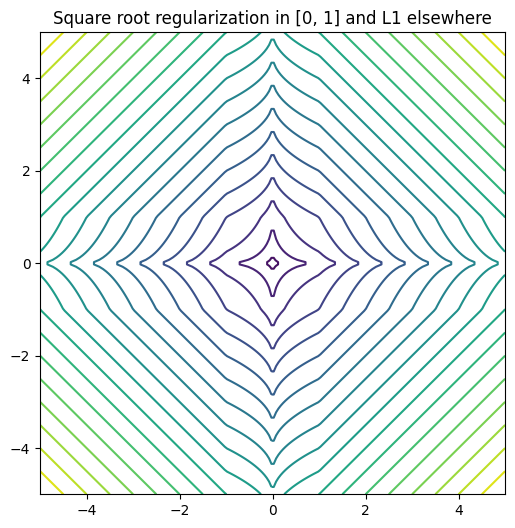

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

def sqrt(vector, scale=1.0):
    '''Square root penalty in [0, 1] and L1 elsewhere'''
    l1 = torch.abs(vector)
    mask = l1 < 1
    loss = (l1.sqrt() * mask) + (l1 * ~mask)
    return loss.sum() * scale

# Create a meshgrid for the input ranges [-5, 5] for both x and y
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Calculate Z for each (x, y) pair using the updated function
Z = np.empty_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vector = torch.tensor([X[i, j], Y[i, j]], dtype=torch.float32)
        Z[i, j] = sqrt(vector).numpy()

plt.figure(figsize=(6, 6))
plt.contour(X, Y, Z, 20, cmap='viridis')
plt.title('Square root regularization in [0, 1] and L1 elsewhere')
plt.show()